In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

from tqdm import tqdm
import math

# Creating the Dataset

We will be working with a basic training dataset that has a roughly linear relationship
$$y=\beta^Tx+\epsilon$$
where $\epsilon \sim \mathcal{N}(0,0.1)$ is some gaussian noise.

For ease of plotting, we will consider the case of $x$ representing one-dimensional data, so that each element of $X$ is given by a vector $x = \begin{bmatrix} 1, x_0 \end{bmatrix}$.

In [271]:
intercept = 10
slope = 3

# beta_true is the true value of beta; we will use SGD to approximate it later
beta_true = np.array([[intercept,slope]])

X = sm.add_constant(np.random.rand(200,1)) # Get 100 random samples for the X values
y = X@np.transpose(beta_true)+np.random.normal(loc=0, scale=0.1, size=(X.shape[0], 1)) # Calculate y-values

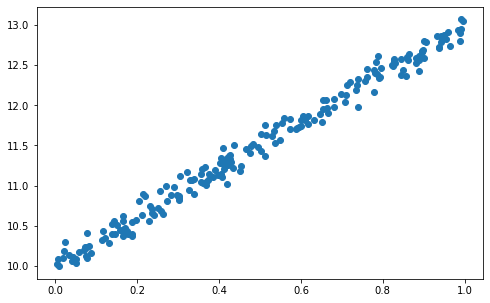

In [272]:
# Here, we plot the data generated above.

plt.figure(figsize=(8,5))
plt.scatter(X[:,1],y)
plt.show()

# Implementing SGD

We want to find $\text{argmin}_{\beta} L(\beta)$, where the loss function $L(\beta)$ is the MSE:
$$L(\beta) = \frac{1}{n} \sum_{i=1}^n(y_i - \beta^Tx_i)^2$$


To accomplish this with Gradient Descent, we use the update rule
$$\beta \leftarrow \beta - \eta \nabla_{\beta} L$$


However, computing $\nabla_\beta L$ can be very constly when the size of our dataset $X$ is large. To approximate it, we use Stochastic Gradient Descent. First, we choose some random element $x_i$ from our dataset (hence "stochastic") and consider the loss of a single sample $x_i$:
$$\hat{L}(\beta) = (y_i-\beta^Tx_i)^2$$
Taking the derivative, we see that
$$\nabla_\beta \hat{L} = -2(y_i-\beta^Tx_i)x_i$$
Hence, we use the update rule
$$\beta \leftarrow \beta+2\eta(y_i-\beta^Tx_i)x_i$$

100%|██████████████████████████████████████| 999/999 [00:00<00:00, 22824.93it/s]


Predicted beta: [10.02389334  2.97128804]


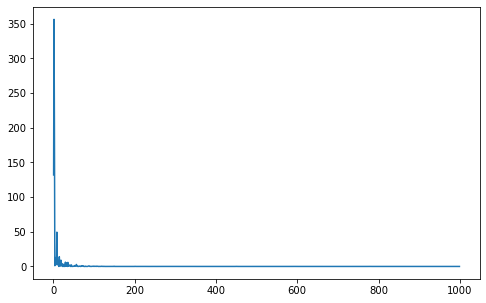

In [277]:
beta = np.zeros(X_const.shape[1]) # First, we initialize beta to 0. An arbitrary choice


loss_values = [] # We will plot the loss at each time step for a visualization later

time_steps = 1e3

for t in tqdm(np.arange(1,time_steps)):
    index = np.random.randint(0,X.shape[0]) # Select a random index
    
    x = X[index]
    y_true = y[index]

    y_hat = np.transpose(beta)@x # Our prediction is y_i = beta^T x_i
    
    loss_values.append((y_true-y_hat)**2) # Append the squared error for our visualization
    
    eta = 1/math.sqrt(t) # Define the learning rate as 1/sqrt(t)
    g = -2*(y_true-y_hat)*x # Use our formula for the gradient, as derived earlier

    beta -= eta*g # Update beta according to our update rule

print("Predicted beta:", beta)
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,time_steps), loss_values)
plt.show()

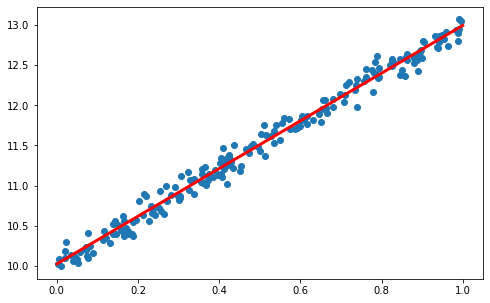

In [289]:
plt.figure(figsize=(8,5))
plt.scatter(X[:, 1],y)

domain = np.arange(np.max(X[:, 1])+0.1, step=0.1)
plt.plot(domain, beta[0]+beta[1]*domain, color="red", linewidth=3)
plt.show()

# SGD on Noisy Datasets

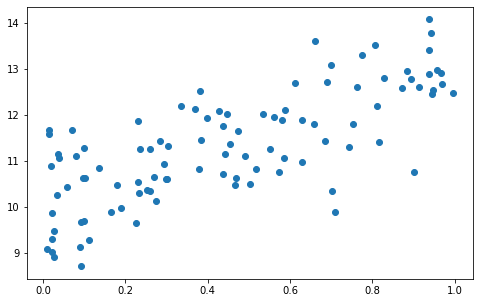

In [319]:
X_noisy = sm.add_constant(np.random.rand(100,1)) # Get 100 random samples for the X values
y_noisy = X_noisy@np.transpose(beta_true)+np.random.normal(loc=0, scale=0.8, size=(X_noisy.shape[0], 1)) # Calculate y-values
plt.figure(figsize=(8,5))
plt.scatter(X_noisy[:,1],y_noisy)
plt.show()

100%|████████████████████████████████████████| 99/99 [00:00<00:00, 22173.12it/s]

Predicted beta: [10.47365424  2.23492513]


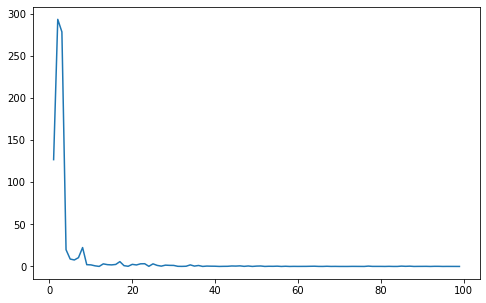

In [338]:
beta = np.zeros(X_const.shape[1]) # We initialize beta


loss_values = []

time_steps = 100

for t in tqdm(np.arange(1,time_steps)):
    index = np.random.randint(0,X.shape[0]) # Select a random index
    
    x = X[index]
    y_true = y[index]

    y_hat = np.transpose(beta)@x # Our prediction is y_i = beta^T x_i
    
    loss_values.append((y_true-y_hat)**2) # Append the squared error for our visualization
    
    eta = 1/math.sqrt(t) # Define the learning rate as 1/sqrt(t)
    g = -2*(y_true-y_hat)*x # Use our formula for the gradient, as derived earlier

    beta -= eta*g # Update beta according to our update rule

print("Predicted beta:", beta)
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,time_steps), loss_values)
plt.show()

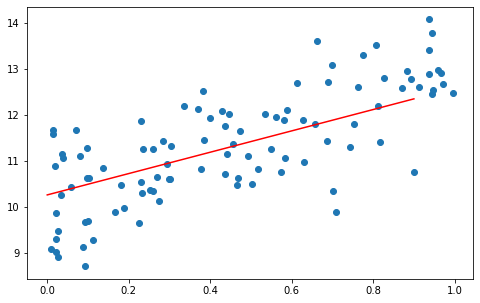

In [326]:
plt.figure(figsize=(8,5))
plt.scatter(X_noisy[:, 1],y_noisy)

domain = np.arange(1, step=0.1)
plt.plot(domain, beta[0]+beta[1]*domain, color="red")
plt.show()

# Batched Gradient Descent

In [343]:
from tqdm import tqdm
import math

beta = np.zeros((X_noisy.shape[1],1))


loss_values = []
batch_size = 100

time_steps = np.arange(1,int(1e2))
for t in tqdm(time_steps):
    selected = np.random.randint(low=0,high=X_noisy.shape[0],size=batch_size)
    x = X_noisy[selected]
    y_true = y_noisy[selected]
    y_hat = np.dot(x, beta)
    MSE = np.mean((y_true-y_hat)**2)
    loss_values.append(MSE)
    
    eta = 1/math.sqrt(t)
    g = np.transpose(np.mean(2*(y_true-y_hat)*(-x), axis=0, keepdims=True))
    test = eta*g
    beta -= eta*g

print("Predicted:", beta)


100%|█████████████████████████████████████████| 99/99 [00:00<00:00, 7073.03it/s]

Predicted: [[9.96583497]
 [3.02378624]]


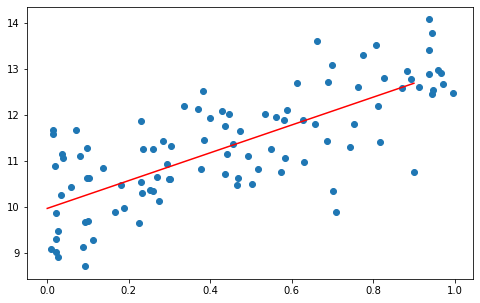

In [344]:
plt.figure(figsize=(8,5))
plt.scatter(X_noisy[:, 1],y_noisy)

domain = np.arange(1, step=0.1)
plt.plot(domain, beta[0]+beta[1]*domain, color="red")

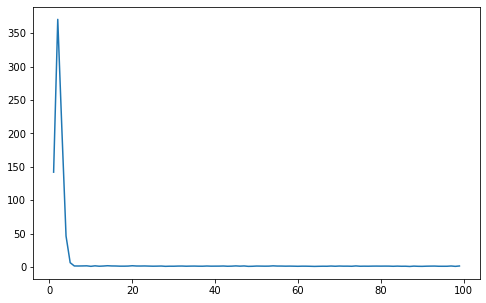

In [313]:
plt.figure(figsize=(8,5))
plt.plot(time_steps, loss_values)